<a href="https://colab.research.google.com/github/dianhana/mesinlearning/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
data = {
    'Text': [
        "di seluruh tempat",
        "di seluruh dunia",
        "dimanapun lagu cinta ini terputar",
        "aku bergeleng kecil dan tersenyum tipis",
        "andai lagu ini tertulis olehku"
    ],
    'Sentimen': [1, 1, 0, 0, 1]  # 1 = Positif, 0 = Negatif
}

df = pd.DataFrame(data)

In [4]:
print("dataset Awal:")
print(df)

dataset Awal:
                                      Text  Sentimen
0                        di seluruh tempat         1
1                         di seluruh dunia         1
2        dimanapun lagu cinta ini terputar         0
3  aku bergeleng kecil dan tersenyum tipis         0
4           andai lagu ini tertulis olehku         1


In [5]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.strip()
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [6]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Cleaned_Text'])

In [7]:
print("\nfitur Kata (Unigram):")
print(vectorizer.get_feature_names_out())


fitur Kata (Unigram):
['aku' 'andai' 'bergeleng' 'cinta' 'dan' 'di' 'dimanapun' 'dunia' 'ini'
 'kecil' 'lagu' 'olehku' 'seluruh' 'tempat' 'terputar' 'tersenyum'
 'tertulis' 'tipis']


In [8]:
print("\nmatriks BOW (Unigram):")
print(X.toarray())


matriks BOW (Unigram):
[[0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0]
 [1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1]
 [0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0]]


In [9]:
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
X_bigram = vectorizer_bigram.fit_transform(df['Cleaned_Text'])

In [10]:
print("\nfitur Kata (Bigram):")
print(vectorizer_bigram.get_feature_names_out())


fitur Kata (Bigram):
['aku bergeleng' 'andai lagu' 'bergeleng kecil' 'cinta ini'
 'dan tersenyum' 'di seluruh' 'dimanapun lagu' 'ini terputar'
 'ini tertulis' 'kecil dan' 'lagu cinta' 'lagu ini' 'seluruh dunia'
 'seluruh tempat' 'tersenyum tipis' 'tertulis olehku']


In [11]:
print("\nmatriks BOW (Bigram):")
print(X_bigram.toarray())


matriks BOW (Bigram):
[[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0]
 [1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1]]


<ipython-input-13-bca595f23eee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')


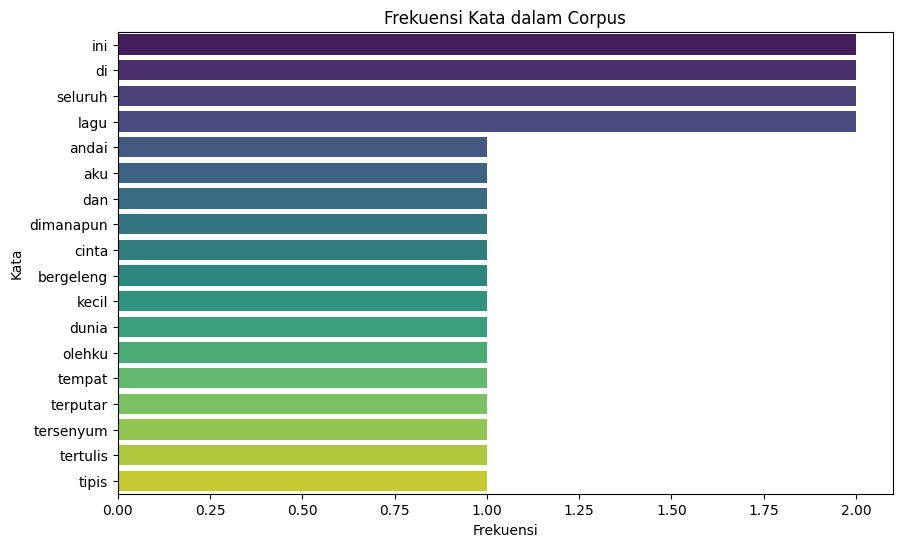

In [13]:
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')
plt.title('Frekuensi Kata dalam Corpus')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.show()